# Notebook to study the returned phase over a range of sizes

Just look at phase phase in the horizontal channel and compare to an ellipse

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from WIPL_python_analysis.DictToSinglePolResults import OutputDictToSinglePolResultsConverter as converter

In [2]:
BASE_DRIVE_PATH = '/Users/sstk4353/Library/CloudStorage/GoogleDrive-thomas.matthews@ncas.ac.uk/My Drive/WIPL/Bernard_ellipsoid_comparison/'
BERNARD_PATH = 'Bernard/'
ELLIPSOID_PATH = 'Ellipsoid/'

In [3]:
def plot_corrected_rcs(df, title=None):
    phi = df['phi']
    corrected_rcs = df['Corrected_RCS']
    
    plt.figure(figsize=(8, 6))
    plt.plot(phi, corrected_rcs, label='Corrected RCS')
    plt.xlabel('Azimuth (degrees)')
    plt.ylabel('Corrected RCS (cm^2)')

    if title:
        plt.title(title)

    plt.legend()
    plt.show()

In [4]:
frequency_name_list = ['020', '027', '037', '049', '067', '090', '120', '160', '220', '300']
frequencies = [2,2.7,3.7,4.9,6.7,9,12,16,22,30]

In [5]:
single_pol_obj_dict = {
    'Bernard' :{
         '0206': {
            'H' : [],
            'V' : [],
        },
        '0553' : {
            'H' : [],
            'V' : [],
        },
         '1000': {
            'H' : [],
            'V' : [],
        },
         '1588': {
            'H' : [],
            'V' : [],
        },
    },
    'Ellipsoid' : {
         '0206': {
            'H' : [],
            'V' : [],
        },
        '0553' : {
            'H' : [],
            'V' : [],
        },
         '1000': {
            'H' : [],
            'V' : [],
        },
         '1588': {
            'H' : [],
            'V' : [],
        },
    },
}

In [6]:
for scale in ['0206', '0553', '1000', '1588']:
    for model, model_path in zip(['Bernard', 'Ellipsoid'], [BERNARD_PATH, ELLIPSOID_PATH]):
        for pol in ['H']:#, 'V']:
            for freq in frequency_name_list:
                path = BASE_DRIVE_PATH + model_path + f'{scale}/{pol}_CSV/' + f'{model}_{scale}_sweep_{pol}_{freq}_df.csv'
                single_pol_obj_dict[model][scale][pol].append(pd.read_csv(path))

In [7]:
for scale in ['1000']:
    for model, model_path in zip(['Bernard', 'Ellipsoid'], [BERNARD_PATH, ELLIPSOID_PATH]):
        for pol in ['V']:
            for freq in frequency_name_list:
                path = BASE_DRIVE_PATH + model_path + f'{scale}/{pol}_CSV/' + f'{model}_{scale}_sweep_{pol}_{freq}_df.csv'
                single_pol_obj_dict[model][scale][pol].append(pd.read_csv(path))

In [8]:
def get_horizontal_returned_phase(df):
    horizontal_field = df['Ephi'].astype(complex).to_numpy()
    phase = np.angle(horizontal_field) * 180 / np.pi
    return phase


In [9]:
def get_horizontal_returned_power(df):
    horizontal_field = df['Ephi'].astype(complex).to_numpy()
    power = np.abs(horizontal_field)
    return power


In [29]:
def get_linear_depol_ratio(df):
    horizontal_power = get_horizontal_returned_power(df)
    vertical_power = df['Etheta'].astype(complex).to_numpy()
    vertical_power = np.abs(vertical_power)
    depol_ratio = 10 * np.log10(vertical_power / horizontal_power)
    return depol_ratio

Text(0.5, 1.0, 'Phase difference in horizontal channel between Moth and Ellipsoid models at 4.9 GHz')

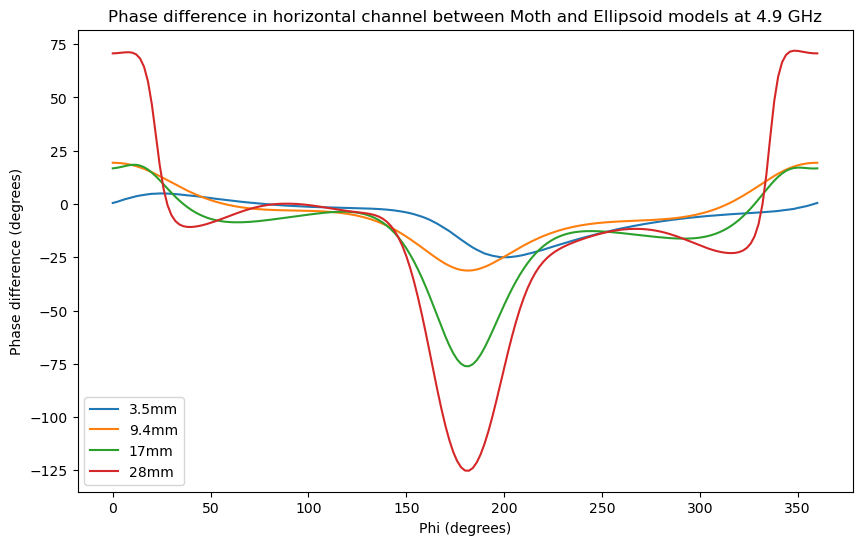

In [10]:
polarisation = 'H'
frequency = 3 #4.9GHz

for scale, size in zip(['0206', '0553', '1000', '1588'], ['3.5mm', '9.4mm', '17mm', '28mm']):
    df_bernard = single_pol_obj_dict['Bernard'][scale][polarisation][frequency]
    df_ellipsoid = single_pol_obj_dict['Ellipsoid'][scale][polarisation][frequency]
    phase_bernard = get_horizontal_returned_phase(df_bernard)
    phase_ellipsoid = get_horizontal_returned_phase(df_ellipsoid)
    
    phase_difference = phase_bernard - phase_ellipsoid
    plt.plot(df_bernard['phi'], phase_difference, label=f'{size}', linestyle = '-')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Phase difference (degrees)')
plt.title(f'Phase difference in horizontal channel between Moth and Ellipsoid models at 4.9 GHz')


Text(0.5, 1.0, 'Ratio of co-polar horizontal power scattered for Moth and Ellipsoid at 4.9 GHz')

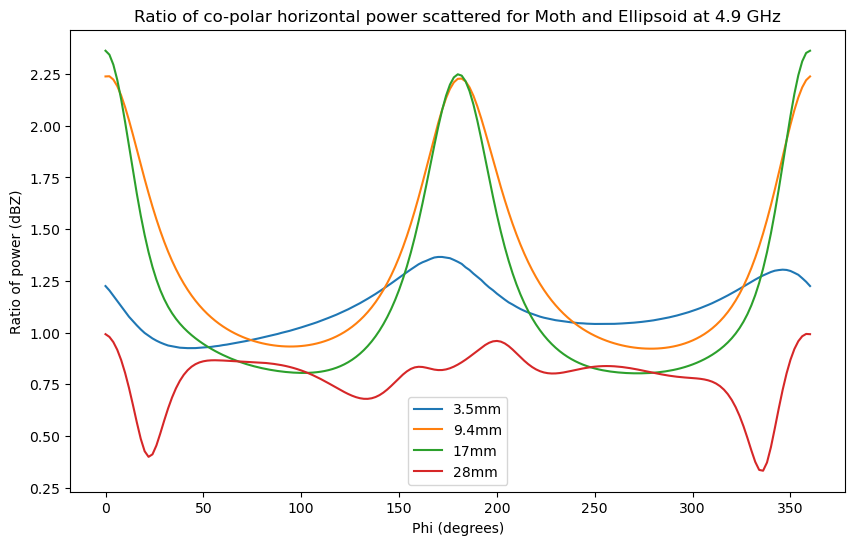

In [11]:
polarisation = 'H'
frequency = 3 #4.9GHz

for scale, size in zip(['0206', '0553', '1000', '1588'], ['3.5mm', '9.4mm', '17mm', '28mm']):
    df_bernard = single_pol_obj_dict['Bernard'][scale][polarisation][frequency]
    df_ellipsoid = single_pol_obj_dict['Ellipsoid'][scale][polarisation][frequency]
    power_bernard = get_horizontal_returned_power(df_bernard)
    power_ellipsoid = get_horizontal_returned_power(df_ellipsoid)
    
    # power_ratio = 10*np.log10(power_bernard/power_ellipsoid)
    plt.plot(df_bernard['phi'], power_bernard/power_ellipsoid, label=f'{size}', linestyle = '-')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Ratio of power (dBZ)')
plt.title(f'Ratio of co-polar horizontal power scattered for Moth and Ellipsoid at 4.9 GHz')

Text(0.5, 1.0, 'Far field WIPL-D phase in horizontal channel for Moth and Ellipsoid models at 4.9 GHz')

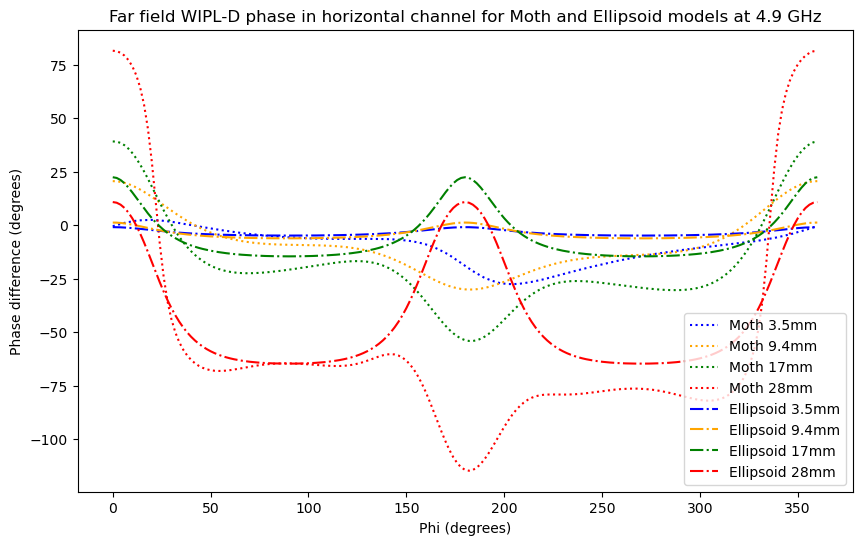

In [12]:
polarisation = 'H'
frequency = 3 #4.9GHz
model_name = 'Moth'
model = 'Bernard'

for scale, size, colour in zip(['0206', '0553', '1000', '1588'], ['3.5mm', '9.4mm', '17mm', '28mm'], ['blue', 'orange', 'green', 'red']):
    df = single_pol_obj_dict[model][scale][polarisation][frequency]
    phase = get_horizontal_returned_phase(df)
    
    plt.plot(df['phi'], phase, label=f'{model_name} {size}', linestyle = ':', color=colour)

model_name = 'Ellipsoid'
model = 'Ellipsoid'

for scale, size, colour in zip(['0206', '0553', '1000', '1588'], ['3.5mm', '9.4mm', '17mm', '28mm'], ['blue', 'orange', 'green', 'red']):
    df = single_pol_obj_dict[model][scale][polarisation][frequency]
    phase = get_horizontal_returned_phase(df)
    
    plt.plot(df['phi'], phase, label=f'{model_name} {size}', linestyle = '-.', color=colour)


fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend(loc='lower right')
plt.xlabel('Phi (degrees)')
plt.ylabel('Phase difference (degrees)')
plt.title(f'Far field WIPL-D phase in horizontal channel for Moth and Ellipsoid models at 4.9 GHz')

### Breakdown by morphological contribution 

In [13]:
path = BASE_DRIVE_PATH + f'Bernard/1000/H_DICT_PKL_low_res/Bernard_0063_1000_V_049_no_leg_wing.pkl'
conv = converter.from_pickle(path)
B_0063_no_leg_wing_df = conv.generate_output_df()

output_path = BASE_DRIVE_PATH + f'Bernard/1000/' + f'H_CSV/' + f'BBernard_0063_1000_V_049_no_leg_wing_df.csv'

B_0063_no_leg_wing_df.to_csv(output_path)

In [14]:
path = BASE_DRIVE_PATH + f'Bernard/1000/H_DICT_PKL_low_res/Bernard_0063_1000_V_049_no_leg.pkl'
conv = converter.from_pickle(path)
B_0063_no_leg_df = conv.generate_output_df()

output_path = BASE_DRIVE_PATH + f'Bernard/1000/' + f'H_CSV/' + f'BBernard_0063_1000_V_049_no_leg_df.csv'

B_0063_no_leg_df.to_csv(output_path)

In [15]:
path = BASE_DRIVE_PATH + f'Bernard/1000/H_DICT_PKL_low_res/Bernard_0063_1000_V_049_no_wing.pkl'
conv = converter.from_pickle(path)
B_0063_no_wing_df = conv.generate_output_df()

output_path = BASE_DRIVE_PATH + f'Bernard/1000/' + f'H_CSV/' + f'BBernard_0063_1000_V_049_no_wing_df.csv'

B_0063_no_wing_df.to_csv(output_path)

Text(0.5, 1.0, 'Phase difference in horizontal channel between Moth and Ellipsoid models at 4.9 GHz')

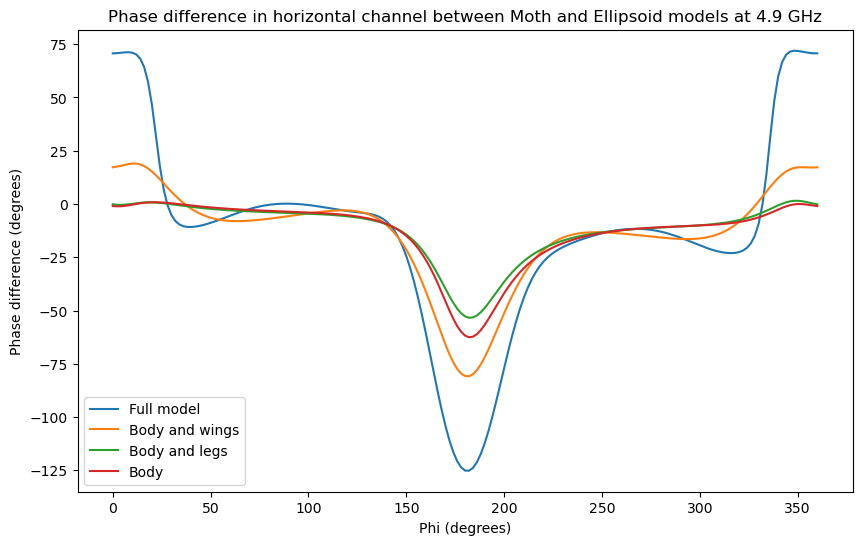

In [21]:
polarisation = 'H'
frequency = 3 #4.9GHz
scale = '1000'
size = '17mm'

df_bernard_full = single_pol_obj_dict['Bernard']['1000']['H'][frequency]
df_ellipsoid = single_pol_obj_dict['Ellipsoid'][scale][polarisation][frequency]
phase_bernard_full = get_horizontal_returned_phase(df_bernard_full)
phase_ellipsoid = get_horizontal_returned_phase(df_ellipsoid)

phase_difference_full = phase_bernard_full - phase_ellipsoid
plt.plot(df['phi'], phase_difference, label=f'Full model', linestyle = '-')

phase_no_leg = get_horizontal_returned_phase(B_0063_no_leg_df)
phase_difference_no_leg = phase_no_leg - phase_ellipsoid
plt.plot(df['phi'], phase_difference_no_leg, label=f'Body and wings', linestyle = '-')

phase_no_wing = get_horizontal_returned_phase(B_0063_no_wing_df)
phase_difference_no_wing = phase_no_wing - phase_ellipsoid
plt.plot(df['phi'], phase_difference_no_wing, label=f'Body and legs', linestyle = '-')

phase_no_leg_wing = get_horizontal_returned_phase(B_0063_no_leg_wing_df)
phase_difference_no_leg_wing = phase_no_leg_wing - phase_ellipsoid
plt.plot(df['phi'], phase_difference_no_leg_wing, label=f'Body', linestyle = '-')


fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Phase difference (degrees)')
plt.title(f'Phase difference in horizontal channel between Moth and Ellipsoid models at 4.9 GHz')

Text(0.5, 1.0, 'Ratio of co-polar horizontal power scattered for Moth and Ellipsoid at 4.9 GHz')

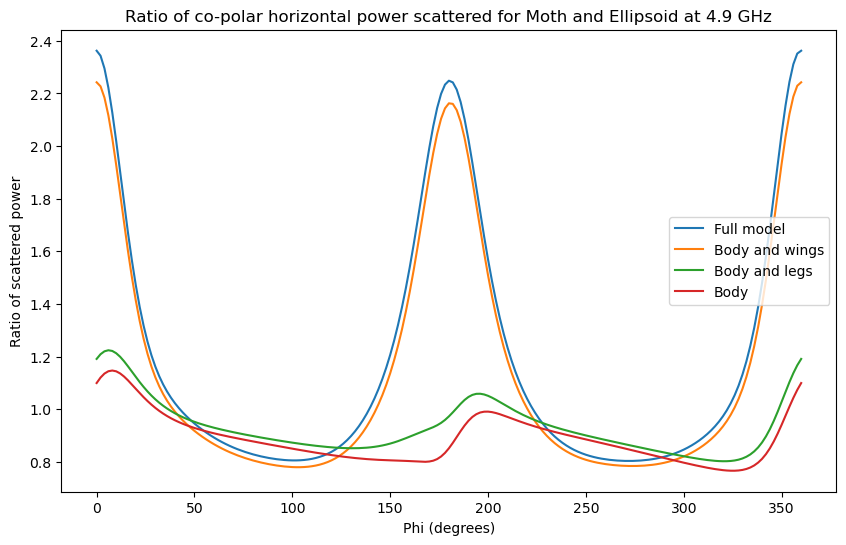

In [17]:
polarisation = 'H'
frequency = 3 #4.9GHz
scale = '1000'
size = '17mm'

df_bernard_full = single_pol_obj_dict['Bernard'][scale][polarisation][frequency]
df_ellipsoid = single_pol_obj_dict['Ellipsoid'][scale][polarisation][frequency]
power_bernard_full = get_horizontal_returned_power(df_bernard_full)
power_ellipsoid = get_horizontal_returned_power(df_ellipsoid)

#Zdr_full = 10*np.log10(power_bernard_full/power_ellipsoid)
plt.plot(df['phi'], power_bernard_full/power_ellipsoid, label=f'Full model', linestyle = '-')

power_no_leg = get_horizontal_returned_power(B_0063_no_leg_df)
# Zdr_no_leg = 10*np.log10(power_no_leg/power_ellipsoid)
plt.plot(df['phi'], power_no_leg/power_ellipsoid, label=f'Body and wings', linestyle = '-')

power_no_wing = get_horizontal_returned_power(B_0063_no_wing_df)
# Zdr_no_wing = 10*np.log10(power_no_wing/power_ellipsoid)
plt.plot(df['phi'], power_no_wing/power_ellipsoid, label=f'Body and legs', linestyle = '-')

power_no_leg_wing = get_horizontal_returned_power(B_0063_no_leg_wing_df)
# Zdr_no_leg_wing = 10*np.log10(power_no_leg_wing/power_ellipsoid)
plt.plot(df['phi'], power_no_leg_wing/power_ellipsoid, label=f'Body', linestyle = '-')


fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Ratio of scattered power')
plt.title(f'Ratio of co-polar horizontal power scattered for Moth and Ellipsoid at 4.9 GHz')

### Linear depol

Text(0.5, 1.0, 'Linear depolarisation for moth at 4.9 GHz')

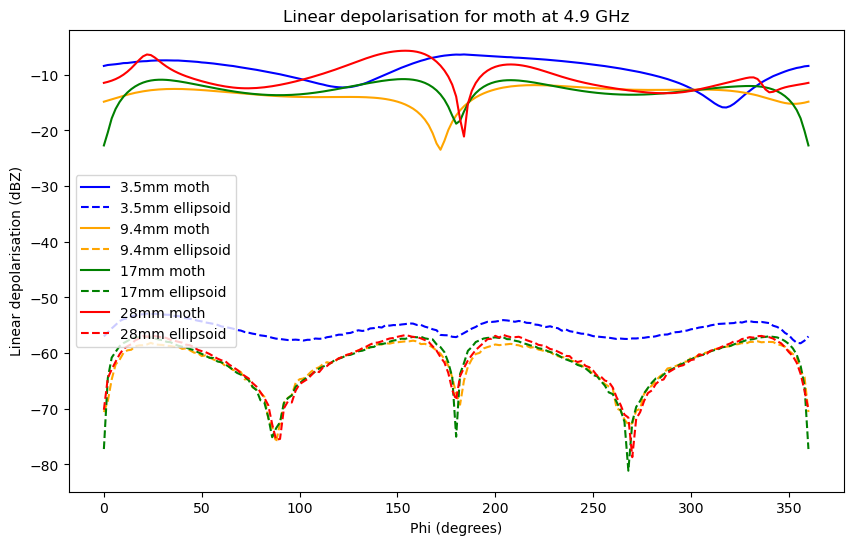

In [33]:
polarisation = 'H'
frequency = 3 #4.9GHz

for scale, size, colour in zip(['0206', '0553', '1000', '1588'], ['3.5mm', '9.4mm', '17mm', '28mm'], ['blue', 'orange', 'green', 'red']):
    df_bernard = single_pol_obj_dict['Bernard'][scale][polarisation][frequency]
    df_ellipsoid = single_pol_obj_dict['Ellipsoid'][scale][polarisation][frequency]
    ldp_bernard = get_linear_depol_ratio(df_bernard)
    ldp_ellipsoid = get_linear_depol_ratio(df_ellipsoid)
    
    # power_ratio = 10*np.log10(power_bernard/power_ellipsoid)
    plt.plot(df_bernard['phi'], ldp_bernard, label=f'{size} moth', linestyle = '-', color=colour)
    plt.plot(df_bernard['phi'], ldp_ellipsoid, label=f'{size} ellipsoid', linestyle = '--', color=colour)

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Linear depolarisation (dBZ)')
plt.title(f'Linear depolarisation for moth at 4.9 GHz')

Text(0.5, 1.0, 'Difference in linear depolarisation for Moth and Ellipsoid at 4.9 GHz')

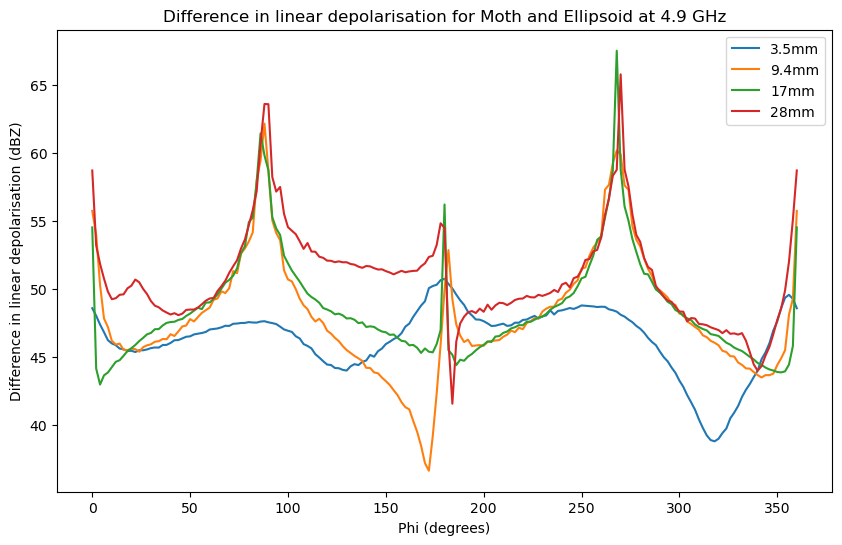

In [30]:
polarisation = 'H'
frequency = 3 #4.9GHz

for scale, size in zip(['0206', '0553', '1000', '1588'], ['3.5mm', '9.4mm', '17mm', '28mm']):
    df_bernard = single_pol_obj_dict['Bernard'][scale][polarisation][frequency]
    df_ellipsoid = single_pol_obj_dict['Ellipsoid'][scale][polarisation][frequency]
    ldp_bernard = get_linear_depol_ratio(df_bernard)
    ldp_ellipsoid = get_linear_depol_ratio(df_ellipsoid)
    
    # power_ratio = 10*np.log10(power_bernard/power_ellipsoid)
    plt.plot(df_bernard['phi'], ldp_bernard-ldp_ellipsoid, label=f'{size}', linestyle = '-')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Difference in linear depolarisation (dBZ)')
plt.title(f'Difference in linear depolarisation for Moth and Ellipsoid at 4.9 GHz')

Text(0.5, 1.0, 'Difference in linear depolarisation for Moth and Ellipsoid at 4.9 GHz')

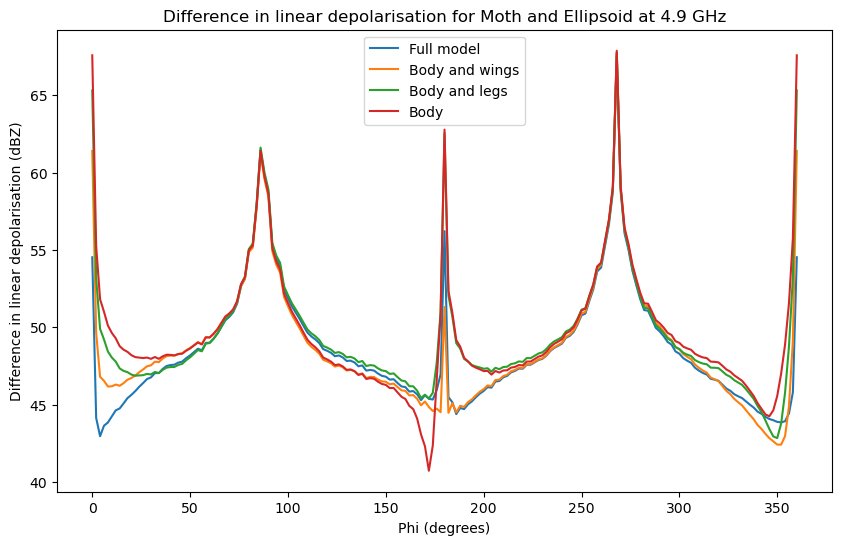

In [35]:
polarisation = 'H'
frequency = 3 #4.9GHz
scale = '1000'
size = '17mm'

df_bernard_full = single_pol_obj_dict['Bernard'][scale][polarisation][frequency]
df_ellipsoid = single_pol_obj_dict['Ellipsoid'][scale][polarisation][frequency]
ldp_bernard_full = get_linear_depol_ratio(df_bernard_full)
ldp_ellipsoid = get_linear_depol_ratio(df_ellipsoid)

#Zdr_full = 10*np.log10(power_bernard_full/power_ellipsoid)
plt.plot(df['phi'], ldp_bernard_full-ldp_ellipsoid, label=f'Full model', linestyle = '-')

ldp_no_leg = get_linear_depol_ratio(B_0063_no_leg_df)
# Zdr_no_leg = 10*np.log10(power_no_leg/power_ellipsoid)
plt.plot(df['phi'], ldp_no_leg-ldp_ellipsoid, label=f'Body and wings', linestyle = '-')

ldp_no_wing = get_linear_depol_ratio(B_0063_no_wing_df)
# Zdr_no_wing = 10*np.log10(power_no_wing/power_ellipsoid)
plt.plot(df['phi'], ldp_no_wing-ldp_ellipsoid, label=f'Body and legs', linestyle = '-')

ldp_no_leg_wing = get_linear_depol_ratio(B_0063_no_leg_wing_df)
# Zdr_no_leg_wing = 10*np.log10(power_no_leg_wing/power_ellipsoid)
plt.plot(df['phi'], ldp_no_leg_wing-ldp_ellipsoid, label=f'Body', linestyle = '-')


fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Difference in linear depolarisation (dBZ)')
plt.title(f'Difference in linear depolarisation for Moth and Ellipsoid at 4.9 GHz')

### Compare to higher resolution

In [18]:
path = BASE_DRIVE_PATH + f'Bernard/1000/H_DICT_PKL/Bernard_0250_1000_H_049.pkl'
conv = converter.from_pickle(path)
B_0250_df = conv.generate_output_df()

output_path = BASE_DRIVE_PATH + f'Bernard/1000/' + f'H_CSV/' + f'Bernard_0250_1000_H_049_df.csv'

B_0250_df.to_csv(output_path)

Text(0.5, 1.0, 'Ratio of co-polar horizontal power scattered for Moth and Ellipsoid at 4.9 GHz')

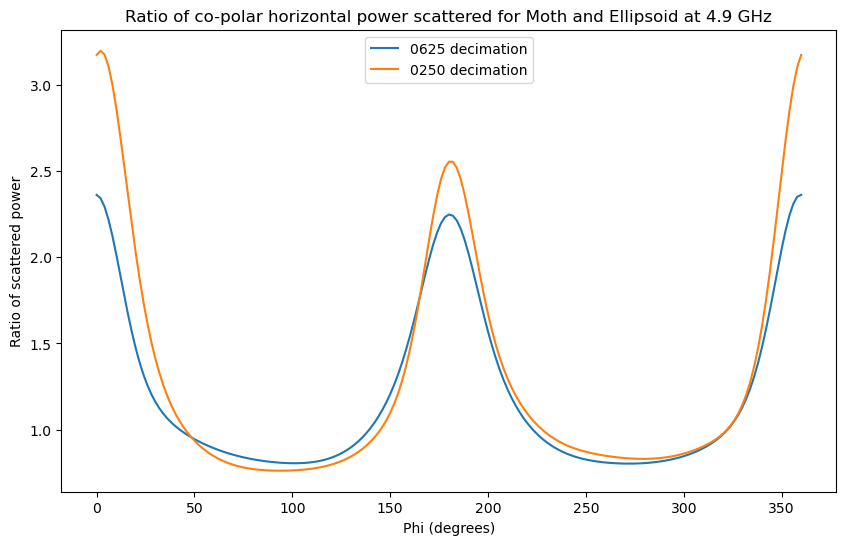

In [28]:
plt.plot(df['phi'], power_bernard_full/power_ellipsoid, label=f'0625 decimation', linestyle = '-')

power_bernard_0250 = get_horizontal_returned_power(B_0250_df)

plt.plot(df['phi'], power_bernard_0250/power_ellipsoid, label=f'0250 decimation', linestyle = '-')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Ratio of scattered power')
plt.title(f'Ratio of co-polar horizontal power scattered for Moth and Ellipsoid at 4.9 GHz')

Text(0.5, 1.0, 'Phase difference in horizontal channel between Moth and Ellipsoid models at 4.9 GHz')

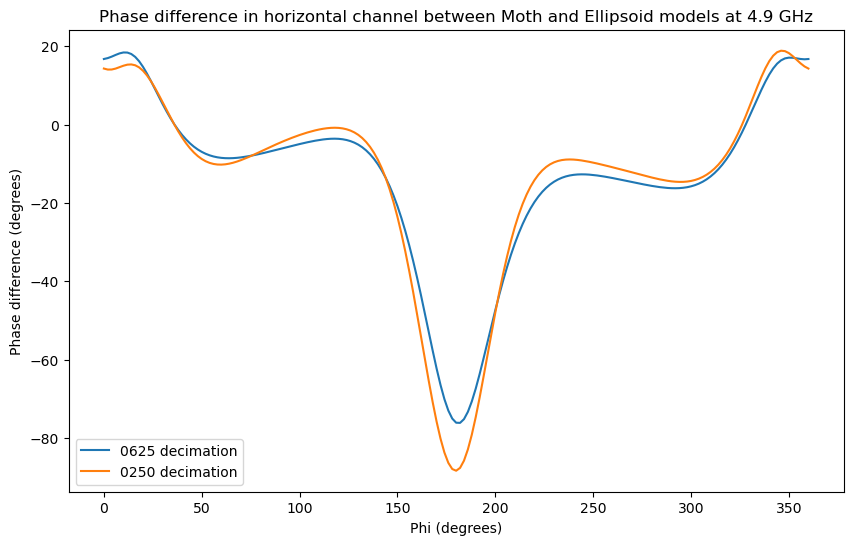

In [25]:
plt.plot(df['phi'], phase_difference_full, label=f'0625 decimation', linestyle = '-')

phase_bernard_0250 = get_horizontal_returned_phase(B_0250_df)

plt.plot(df['phi'], phase_bernard_0250 - phase_ellipsoid, label=f'0250 decimation', linestyle = '-')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Phase difference (degrees)')
plt.title(f'Phase difference in horizontal channel between Moth and Ellipsoid models at 4.9 GHz')